In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("seaborn-v0_8")

In [69]:
df = pd.read_csv("AAPL.csv")
df2 = df.drop(['Volume'], axis=1)
df2 = df2.rename(columns={'Close': 'Price'})
df = df2.set_index('Date')
data = df2.set_index('Date')

In [70]:
data

,Open,High,Low,Price
Date,,,,
2019-01-02,38.72,39.71,38.56,39.48
2019-01-03,36.00,36.43,35.50,35.55
2019-01-04,36.13,37.14,35.95,37.07
2019-01-07,37.18,37.21,36.48,36.98
2019-01-08,37.39,37.96,37.13,37.69
...,...,...,...,...
2023-12-22,195.18,195.41,192.97,193.60
2023-12-26,193.61,193.89,192.83,193.05
2023-12-27,192.49,193.50,191.09,193.15


In [71]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1258 entries, 2019-01-02 to 2023-12-29
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    1258 non-null   float64
 1   High    1258 non-null   float64
 2   Low     1258 non-null   float64
 3   Price   1258 non-null   float64
dtypes: float64(4)
memory usage: 49.1+ KB


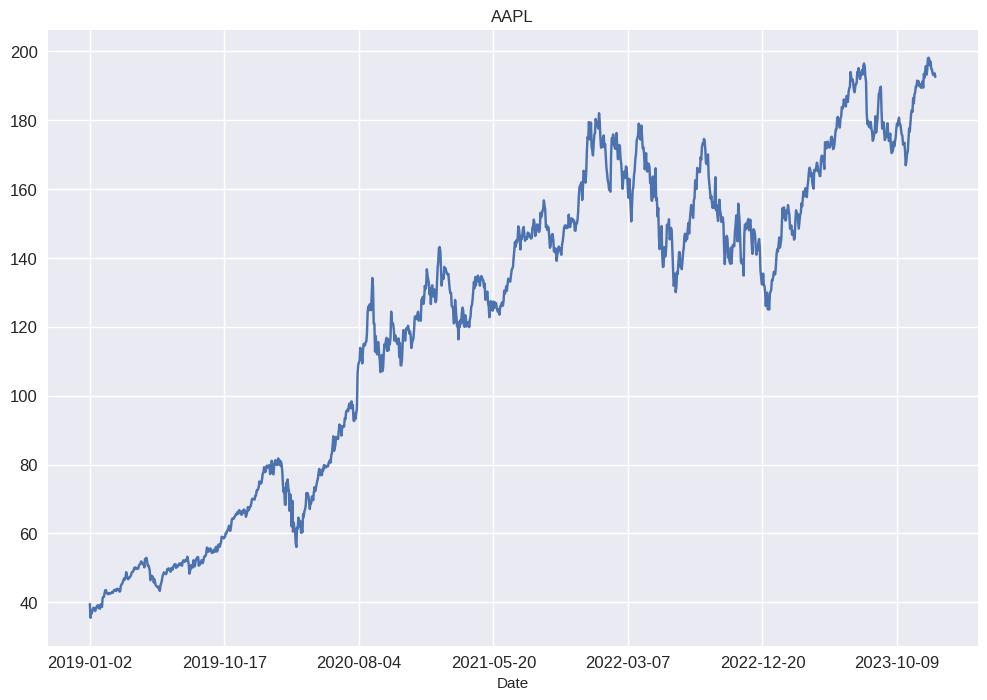

In [72]:
data.Price.plot(figsize = (12, 8), title = "AAPL", fontsize = 12)
plt.show()

In [73]:
periods = 14

In [74]:
data["roll_low"] = data.Low.rolling(periods).min()

In [75]:
data["roll_high"] = data.High.rolling(periods).max()

In [76]:
data

,Open,High,Low,Price,roll_low,roll_high
Date,,,,,,
2019-01-02,38.72,39.71,38.56,39.48,NaN,NaN
2019-01-03,36.00,36.43,35.50,35.55,NaN,NaN
2019-01-04,36.13,37.14,35.95,37.07,NaN,NaN
2019-01-07,37.18,37.21,36.48,36.98,NaN,NaN
2019-01-08,37.39,37.96,37.13,37.69,NaN,NaN
...,...,...,...,...,...,...
2023-12-22,195.18,195.41,192.97,193.60,190.18,199.62
2023-12-26,193.61,193.89,192.83,193.05,191.42,199.62
2023-12-27,192.49,193.50,191.09,193.15,191.09,199.62


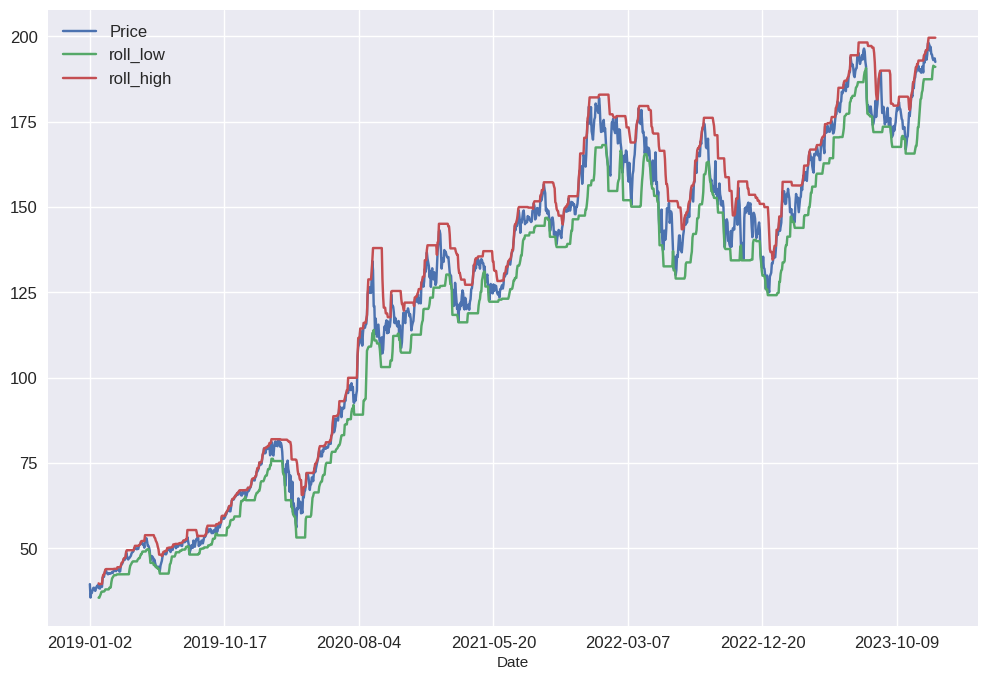

In [77]:
data.loc[:, ["Price", "roll_low", "roll_high"]].plot(figsize = (12, 8), fontsize = 12)
plt.legend(fontsize = 12)
plt.show()

In [78]:
data["K"] = (data.Price - data.roll_low) / (data.roll_high - data.roll_low) * 100

In [79]:
moving_av = 3

In [80]:
data["D"] = data.K.rolling(moving_av).mean()

In [81]:
data["position"] = np.where(data["K"] > data["D"], 1, -1)

In [82]:
data["returns"] = np.log(data.Price.div(data.Price.shift(1)))

In [83]:
data.dropna(inplace = True)

In [84]:
data["strategy"] = data.position.shift(1) * data["returns"]

In [85]:
data.dropna(inplace = True)

In [86]:
data["creturns"] = data["returns"].cumsum().apply(np.exp)
data["cstrategy"] = data["strategy"].cumsum().apply(np.exp)

In [87]:
data

,Open,High,Low,Price,roll_low,roll_high,K,D,position,returns,strategy,creturns,cstrategy
Date,,,,,,,,,,,,,
2019-01-25,38.87,39.53,38.58,39.44,36.48,39.53,97.049180,78.488142,1,0.032469,-0.032469,1.033002,0.968053
2019-01-28,38.95,39.08,38.42,39.08,37.13,39.53,81.250000,80.550484,1,-0.009170,-0.009170,1.023573,0.959217
2019-01-29,39.06,39.53,38.53,38.67,37.31,39.53,61.261261,79.853481,-1,-0.010547,-0.010547,1.012834,0.949153
2019-01-30,40.81,41.54,40.06,41.31,37.31,41.54,94.562648,79.024636,1,0.066040,-0.066040,1.081980,0.888496
2019-01-31,41.53,42.25,41.14,41.61,37.31,42.25,87.044534,80.956148,1,0.007236,0.007236,1.089838,0.894948
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-22,195.18,195.41,192.97,193.60,190.18,199.62,36.228814,52.092705,-1,-0.005563,0.005563,5.070718,0.660453
2023-12-26,193.61,193.89,192.83,193.05,191.42,199.62,19.878049,38.505081,-1,-0.002845,0.002845,5.056312,0.662334
2023-12-27,192.49,193.50,191.09,193.15,191.09,199.62,24.150059,26.752307,-1,0.000518,-0.000518,5.058931,0.661991


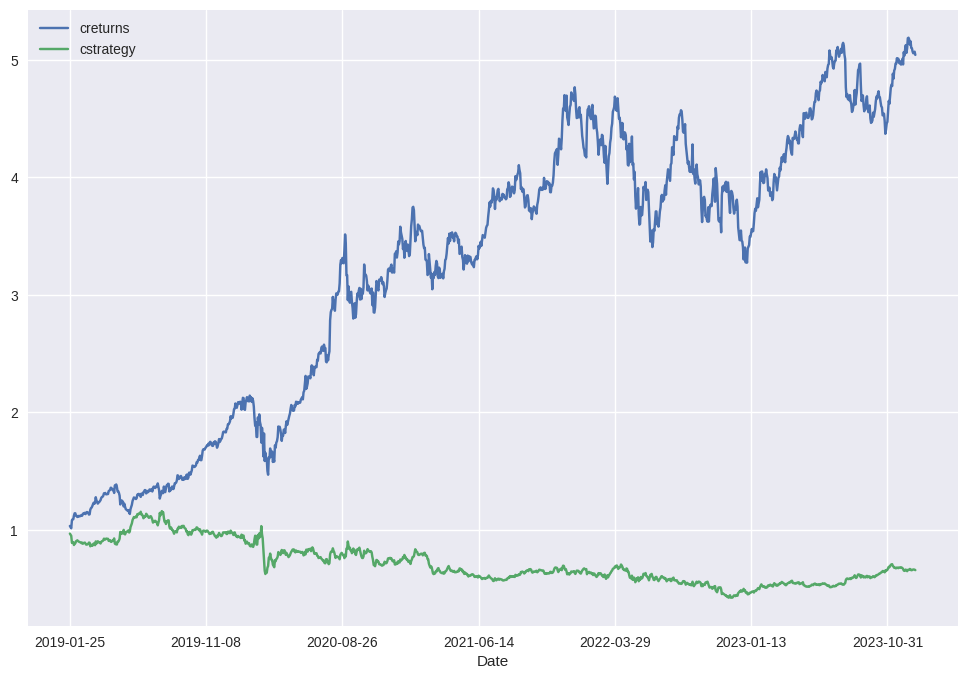

In [88]:
data[["creturns", "cstrategy"]].plot(figsize = (12 , 8))
plt.show()

---------------------

In [89]:
from SOBacktester import SOBacktester as SO

In [90]:
ptc = 0

In [91]:
tester = SO("BTCUSD", 14, 3, "2/1/2019", "29/12/2023", ptc)

In [92]:
tester

SOBacktester(symbol = BTCUSD, periods = 14, D_mw = 3, start = 2/1/2019, end = 29/12/2023)

In [93]:
tester.data

,Open,High,Low,Close,Volume,returns,roll_low,roll_high,K,D
Date,,,,,,,,,,
2/1/2019,38.72,39.71,38.56,39.48,148158952,NaN,NaN,NaN,NaN,NaN
3/1/2019,36.00,36.43,35.50,35.55,365248812,-0.104854,NaN,NaN,NaN,NaN
4/1/2019,36.13,37.14,35.95,37.07,234428280,0.041868,NaN,NaN,NaN,NaN
7/1/2019,37.18,37.21,36.48,36.98,219111048,-0.002431,NaN,NaN,NaN,NaN
8/1/2019,37.39,37.96,37.13,37.69,164101248,0.019018,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
22/12/2023,195.18,195.41,192.97,193.60,37149566,-0.005563,190.18,199.62,36.228814,52.092705
26/12/2023,193.61,193.89,192.83,193.05,28919311,-0.002845,191.42,199.62,19.878049,38.505081
27/12/2023,192.49,193.50,191.09,193.15,48087680,0.000518,191.09,199.62,24.150059,26.752307


In [94]:
tester.test_strategy()

(0.656938, -4.385754)

In [95]:
tester.results

,Open,High,Low,Close,Volume,returns,roll_low,roll_high,K,D,position,strategy,trades,creturns,cstrategy
Date,,,,,,,,,,,,,,,
25/1/2019,38.87,39.53,38.58,39.44,134191564,0.032469,36.48,39.53,97.049180,78.488142,1,-0.032469,0.0,1.033002,0.968053
28/1/2019,38.95,39.08,38.42,39.08,104768244,-0.009170,37.13,39.53,81.250000,80.550484,1,-0.009170,0.0,1.023573,0.959217
29/1/2019,39.06,39.53,38.53,38.67,166348952,-0.010547,37.31,39.53,61.261261,79.853481,-1,-0.010547,2.0,1.012834,0.949153
30/1/2019,40.81,41.54,40.06,41.31,244439124,0.066040,37.31,41.54,94.562648,79.024636,1,-0.066040,2.0,1.081980,0.888496
31/1/2019,41.53,42.25,41.14,41.61,162958592,0.007236,37.31,42.25,87.044534,80.956148,1,0.007236,0.0,1.089838,0.894948
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22/12/2023,195.18,195.41,192.97,193.60,37149566,-0.005563,190.18,199.62,36.228814,52.092705,-1,0.005563,0.0,5.070718,0.660453
26/12/2023,193.61,193.89,192.83,193.05,28919311,-0.002845,191.42,199.62,19.878049,38.505081,-1,0.002845,0.0,5.056312,0.662334
27/12/2023,192.49,193.50,191.09,193.15,48087680,0.000518,191.09,199.62,24.150059,26.752307,-1,-0.000518,0.0,5.058931,0.661991


## optimize parameters

In [96]:
tester.optimize_parameters((10, 100, 1), (3, 50, 1))

/content/SOBacktester.py:91: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["position"] = np.where(data["K"] > data["D"], 1, -1)
/content/SOBacktester.py:92: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["strategy"] = data["position"].shift(1) * data["returns"]
/content/SOBacktester.py:91: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org

(array([54., 16.]), 4.315344)

In [97]:
tester1 = SO("BTCUSD", 54, 16, "2/1/2019", "29/12/2023", ptc)

In [98]:
tester1

SOBacktester(symbol = BTCUSD, periods = 54, D_mw = 16, start = 2/1/2019, end = 29/12/2023)

In [99]:
tester1.data

,Open,High,Low,Close,Volume,returns,roll_low,roll_high,K,D
Date,,,,,,,,,,
2/1/2019,38.72,39.71,38.56,39.48,148158952,NaN,NaN,NaN,NaN,NaN
3/1/2019,36.00,36.43,35.50,35.55,365248812,-0.104854,NaN,NaN,NaN,NaN
4/1/2019,36.13,37.14,35.95,37.07,234428280,0.041868,NaN,NaN,NaN,NaN
7/1/2019,37.18,37.21,36.48,36.98,219111048,-0.002431,NaN,NaN,NaN,NaN
8/1/2019,37.39,37.96,37.13,37.69,164101248,0.019018,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
22/12/2023,195.18,195.41,192.97,193.60,37149566,-0.005563,165.67,199.62,82.268041,92.273640
26/12/2023,193.61,193.89,192.83,193.05,28919311,-0.002845,165.67,199.62,80.648012,91.451613
27/12/2023,192.49,193.50,191.09,193.15,48087680,0.000518,165.67,199.62,80.942563,91.062981


In [100]:
tester1.test_strategy()

(4.315344, 0.477027)

In [101]:
data1 = tester1.results

In [102]:
data1

,Open,High,Low,Close,Volume,returns,roll_low,roll_high,K,D,position,strategy,trades,creturns,cstrategy
Date,,,,,,,,,,,,,,,
11/4/2019,50.21,50.25,49.61,49.74,83603244,-0.008408,38.42,50.71,92.107404,90.115348,1,-0.008408,0.0,0.991627,0.991627
12/4/2019,49.80,50.04,49.05,49.72,111042680,-0.000402,38.42,50.71,91.944670,89.754562,1,-0.000402,0.0,0.991228,0.991228
15/4/2019,49.65,49.96,49.50,49.81,70146600,0.001809,38.53,50.71,92.610837,90.062970,1,0.001809,0.0,0.993022,0.993022
16/4/2019,49.87,50.34,49.64,49.81,102785564,0.000000,40.06,50.71,91.549296,90.611887,1,0.000000,0.0,0.993022,0.993022
17/4/2019,49.89,50.85,49.65,50.78,115627116,0.019287,41.14,50.85,99.279094,91.950069,1,0.019287,0.0,1.012360,1.012360
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22/12/2023,195.18,195.41,192.97,193.60,37149566,-0.005563,165.67,199.62,82.268041,92.273640,-1,0.005563,0.0,3.859649,4.291494
26/12/2023,193.61,193.89,192.83,193.05,28919311,-0.002845,165.67,199.62,80.648012,91.451613,-1,0.002845,0.0,3.848684,4.303721
27/12/2023,192.49,193.50,191.09,193.15,48087680,0.000518,165.67,199.62,80.942563,91.062981,-1,-0.000518,0.0,3.850678,4.301492


## Return (01/01/2024 - 30/09/2024)

In [103]:
df = pd.read_csv("2024 AAPL.csv")
df2 = df.drop(['Volume'], axis=1)
df2 = df2.rename(columns={'Close': 'Price'})
data1 = df2.set_index('Date')

In [104]:
periods = 54

In [105]:
data1["roll_low"] = data1.Low.rolling(periods).min()
data1["roll_high"] = data1.High.rolling(periods).max()

In [106]:
data1["K"] = (data1.Price - data1.roll_low) / (data1.roll_high - data1.roll_low) * 100

In [107]:
moving_av = 16

In [108]:
data1["D"] = data1.K.rolling(moving_av).mean()
data1["position"] = np.where(data1["K"] > data1["D"], 1, -1)
data1["returns"] = np.log(data1.Price.div(data1.Price.shift(1)))
data1.dropna(inplace = True)
data1["strategy"] = data1.position.shift(1) * data1["returns"]

In [109]:
data1.dropna(inplace = True)

In [110]:
data1["creturns"] = data1["returns"].cumsum().apply(np.exp)
data1["cstrategy"] = data1["strategy"].cumsum().apply(np.exp)

In [111]:
data1

,Open,High,Low,Price,roll_low,roll_high,K,D,position,returns,strategy,creturns,cstrategy
Date,,,,,,,,,,,,,
2024-04-11,168.34,175.46,168.16,175.04,167.11,196.27,27.194787,9.766278,1,0.042361,-0.042361,1.043271,0.958524
2024-04-12,174.26,178.36,174.21,176.55,167.11,194.76,34.141049,9.618810,1,0.008590,0.008590,1.052271,0.966793
2024-04-15,175.36,176.63,172.50,172.69,167.11,192.20,22.239936,10.363413,1,-0.022106,-0.022106,1.029265,0.945655
2024-04-16,171.75,173.76,168.27,169.38,167.11,191.80,9.194006,10.088720,-1,-0.019353,-0.019353,1.009536,0.927529
2024-04-17,169.61,170.65,168.00,168.00,167.11,191.05,3.717627,9.792208,-1,-0.008181,0.008181,1.001311,0.935148
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-09-24,228.65,229.35,225.73,227.37,196.00,237.23,76.085375,64.346350,1,0.003966,0.003966,1.355167,0.962474
2024-09-25,224.93,227.29,224.02,226.37,196.00,237.23,73.659956,64.892069,1,-0.004408,-0.004408,1.349207,0.958241
2024-09-26,227.30,228.50,225.41,227.52,196.00,237.23,76.449187,65.903165,1,0.005067,0.005067,1.356062,0.963109
